# Handin exercise for week 5: Pandas

#With data aggregation and data visualization answer the following questions:
#What is the change in pct of divorced danes from 2008 to 2020?

In [17]:
import pandas as pd
import numpy as np

#URL fra konsollen i api.statsbanken og df læs fra csv/url. sep adskiller strenge

fraskiltURL = 'https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&OMR%C3%85DE=000&CIVILSTAND=F&Tid=2008K1%2C2020K1'

df = pd.read_csv(fraskiltURL,sep=';')

# Find rækken and kolonnen "indhold". Række 1 og 2, kolonne "indhold"

fraskilt2008 = df.iloc[0]['INDHOLD']
fraskilt2020 = df.iloc[1]['INDHOLD']

fraskiltProcent = round(((fraskilt2020 - fraskilt2008) / fraskilt2008)*100, 2)

print('Fraskilte i 2008: ',fraskilt2008)
print('Fraskilte i 2020: ',fraskilt2020)
print('Procentændring af antal fraskilte: ',fraskiltProcent)

df

Fraskilte i 2008:  428864
Fraskilte i 2020:  544588
Procentændring af antal fraskilte:  26.98


,OMRÅDE,CIVILSTAND,TID,INDHOLD
0,Hele landet,Fraskilt,2008K1,428864
1,Hele landet,Fraskilt,2020K1,544588


In [20]:
# Which of the 5 biggest cities has the highest percentage of 'Never Married' in 2020?

In [25]:
url_ugifte = 'https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&allowVariablesInHead=true&allowCodeOverrideInColumnNames=true&OMR%C3%85DE=101%2C147%2C155%2C185%2C165%2C151%2C153%2C157%2C159%2C161%2C163%2C167%2C169%2C183%2C173%2C175%2C187%2C201%2C240%2C210%2C250%2C190%2C270%2C260%2C217%2C219%2C223%2C230%2C400%2C411%2C253%2C259%2C350%2C265%2C269%2C320%2C376%2C316%2C326%2C360%2C370%2C306%2C329%2C330%2C340%2C336%2C390%2C420%2C440%2C482%2C410%2C450%2C461%2C479%2C492%2C530%2C561%2C563%2C607%2C510%2C621%2C540%2C550%2C573%2C575%2C630%2C580%2C710%2C766%2C615%2C707%2C727%2C730%2C741%2C740%2C746%2C706%2C751%2C657%2C661%2C756%2C665%2C760%2C779%2C671%2C791%2C810%2C813%2C860%2C849%2C825%2C846%2C773%2C840%2C787%2C820%2C851&ALDER=IALT&CIVILSTAND=TOT%2CU&Tid=2020K3'
df2 = pd.read_csv(url_ugifte,sep=';')

#finding cities/totalsize
cities_totalsize = df2.loc[df2.civilstand == 'I alt']

#finding the 5 biggest cities which is København, Aarhus, Aalborg, Odense, Vejle 
top_5_cities = cities_totalsize.nlargest(5, ['Folketal den 1. i kvartalet']) 

#getting the unmarried rows as well.
k =  df2[df2['område'].isin(['København', 'Aarhus', 'Aalborg', 'Odense','Vejle'])]
print(k)

list_cities = ['København','Odense','Vejle','Aarhus','Aalborg']
myDict = {}
percentage_list = []

x = 0
while x < len(k):
    tmp_ialt = df2.iloc[x]['Folketal den 1. i kvartalet']
    tmp_ugift = df2.iloc[x+1]['Folketal den 1. i kvartalet']
    percent = round((tmp_ugift/tmp_ialt )*100, 2)
    percentage_list.append(percent)
    x +=2

#using a dict comprehension to convert cities and percentages into a dict
res = {list_cities[i]: percentage_list[i] for i in range(len(list_cities))} 
print(res)
print('City with the highest percentage of never married is: ', max(res, key=res.get))

        område  alder civilstand     tid  Folketal den 1. i kvartalet
0    København  I alt      I alt  2020K3                       633035
1    København  I alt      Ugift  2020K3                       414218
104     Odense  I alt      I alt  2020K3                       204718
105     Odense  I alt      Ugift  2020K3                       112672
130      Vejle  I alt      I alt  2020K3                       116468
131      Vejle  I alt      Ugift  2020K3                        55161
154     Aarhus  I alt      I alt  2020K3                       349433
155     Aarhus  I alt      Ugift  2020K3                       208470
192    Aalborg  I alt      I alt  2020K3                       217316
193    Aalborg  I alt      Ugift  2020K3                       118694
{'København': 65.43, 'Odense': 58.4, 'Vejle': 40.41, 'Aarhus': 46.62, 'Aalborg': 49.83}
City with the highest percentage of never married is:  København


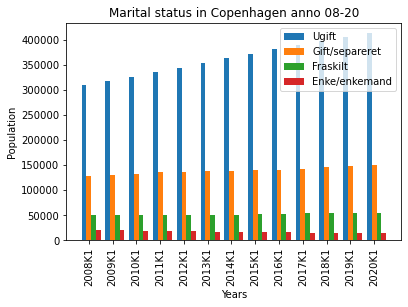

In [26]:
import matplotlib.pyplot as plt
import numpy as np

url_marital_status = 'https://api.statbank.dk/v1/data/FOLK1A/CSV?OMR%C3%85DE=101&CIVILSTAND=U%2CG%2CE%2CF&Tid=2008K1%2C2009K1%2C2010K1%2C2011K1%2C2012K1%2C2013K1%2C2014K1%2C2015K1%2C2016K1%2C2017K1%2C2018K1%2C2019K1%2C2020K1'
df3 = pd.read_csv(url_marital_status,sep=';')

divorced_list = df3.loc[df3['CIVILSTAND'] == 'Fraskilt']['INDHOLD'].values.tolist()
unmarried_list = df3.loc[df3['CIVILSTAND']== 'Ugift']['INDHOLD'].values.tolist()
sep_married_list = df3.loc[df3['CIVILSTAND']== 'Gift/separeret']['INDHOLD'].values.tolist()
enke_list = df3.loc[(df3['CIVILSTAND'] == 'Enke/enkemand')]['INDHOLD'].values.tolist()

list_years = df3.TID.unique()
x = np.arange(len(list_years))

width = 0.20

plt.bar(x - width, unmarried_list, width=width, label="Ugift")
plt.bar(x, sep_married_list, width=width, label="Gift/separeret")
plt.bar(x + width, divorced_list, width=width, label="Fraskilt")
plt.bar(x + (width * 2), enke_list, width=width, label="Enke/enkemand")

plt.xticks(ticks=x, labels=list_years, rotation="vertical")
plt.title("Marital status in Copenhagen anno 08-20")
plt.xlabel("Years")
plt.ylabel("Population")
plt.legend()

D. Show a bar chart of 'Married' and 'Never Married' for all ages in DK (Hint: 2 bars of different color)

marriageURL = 'https://api.statbank.dk/v1/data/FOLK1A/CSV?OMR%C3%85DE=000&ALDER=*&CIVILSTAND=U%2CG&Tid=2020K1'
df4 = pd.read_csv(marriageURL,sep=';')

ages = np.arange(len(df4.ALDER.unique())-1)

notMarried = df4.loc[(df4['ALDER'] != 'I alt') & (df4['CIVILSTAND'] == 'Ugift')]['INDHOLD'].values.tolist()
married = df4.loc[(df4['ALDER'] != 'I alt') & (df4['CIVILSTAND'] == 'Gift/separeret')]['INDHOLD'].values.tolist()


plt.bar(ages - 0.2, notMarried,width = 0.3, label="Ugift")
plt.bar(ages, married,width = 0.3, label="Gift/separeret")

plt.title("Married/Not-married for all ages")
plt.xlabel("Age")
plt.ylabel("Population")

plt.legend()
plt.show()
